In [1]:
import os.path
import time

import torch
torch.cuda.empty_cache()

In [2]:
from src.efficentnet_train import data_load,models_train,visualization,utils,generate_dataset,evaluation
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from src.efficentfacenet import face_descriptor
from torchvision import transforms
import pandas as pd



In [13]:
dataset_path = "../dataset/preprocessed"
model_weights_path="../model_weights/training"
train_data_save_path="../training log"
batch_size=8
stop_n_layers=5

In [4]:
train_history=pd.read_csv(train_data_save_path+"/train_data.csv",index_col=False)

In [5]:
train_history

,Train Loss,no train rows,Test Loss,No test rows,Time taken (M),Notes,Date,Time
0,0.280173,100000,0.342320,25000,65.2,remove sigmoid from classifier + input normali...,15/05/2022,23:26:00
1,0.989897,100000,1.000320,25000,60.1,remove sigmoid from classifier + input normali...,16/05/2022,00:27:00
2,1.000000,100000,1.000320,25000,60.2,remove sigmoid from classifier + input normali...,16/05/2022,01:27:00
3,0.173325,50000,0.284327,10000,63.0,remove sigmoid from classifier + input normali...,16/05/2022,19:28:00
4,0.243919,50000,0.281481,10000,60.0,remove sigmoid from classifier + input normali...,16/05/2022,20:28:00
5,0.210516,50000,0.238477,10000,59.9,remove sigmoid from classifier + input normali...,16/05/2022,21:28:00
6,0.122000,50000,0.259760,10000,62.9,remove sigmoid from classifier + input normali...,16/05/2022,22:38:00
7,0.197626,50000,0.260942,10000,60.1,remove sigmoid from classifier + input normali...,16/05/2022,23:38:00
8,0.168668,50000,0.216822,10000,60.2,remove sigmoid from classifier + input normali...,17/05/2022,00:38:00
9,0.097149,25000,0.268254,5000,31.3,Add sigmoid to classifier + input normalization,17/05/2022,14:29:00


In [4]:
# model = face_descriptor.FaceDescriptorModel(download_weights=True, version="efficientnet_b0")
# model = face_descriptor.FaceDescriptorModel(download_weights=True, version="efficientnet_b0")


In [18]:
import torchvision

In [19]:
model=torchvision.models.convnext_tiny()

In [20]:
model

ConvNeXt(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU()
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384

In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224)),data_load.Normalize()])

In [14]:
model

FaceDescriptorModel(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): ConvNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): ConvNormActiva

In [8]:
train_dataset = data_load.FacesDataset(f"{dataset_path}/train", 5000, transform,True)
test_dataset=data_load.FacesDataset(f"{dataset_path}/test", 1000, transform,True)


 100.0 % of the folders processed img dict loaded in 0.19 m
 100.0 % of the folders processed img dict loaded in 0.04 m


In [8]:
train_dataset.no_of_rows=10000
test_dataset.no_of_rows=2500

In [11]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
#load model weights
model.load_local_weights("weights.pt",cuda_weights=True)

FileNotFoundError: [Errno 2] No such file or directory: 'weights.pt'

In [33]:
a_batch, p_batch, n_batch = next(iter(train_dataset))

In [34]:
a_batch.shape

torch.Size([3, 240, 240])

In [44]:
# for i in range(30):
#     _,ax=plt.subplots(1,3)
#     ax[0].set_title("Anchor")
#     ax[0].imshow(a[i])
#
#     ax[1].set_title("Positive")
#     ax[1].imshow(p[i])
#
#     ax[2].set_title("Negative")
#     ax[2].imshow(n[i])

In [12]:
import torch
import time
x=torch.tensor([1,2])
x.unsqueeze(1)


tensor([[1],
        [2]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.08078408241271973


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

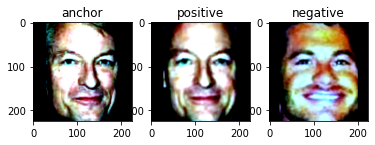

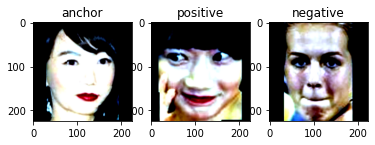

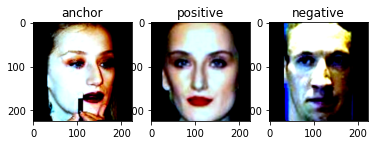

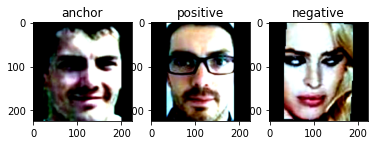

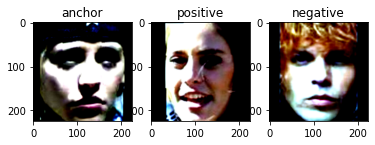

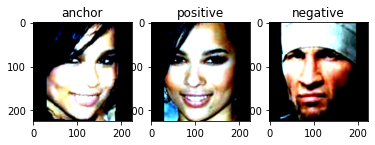

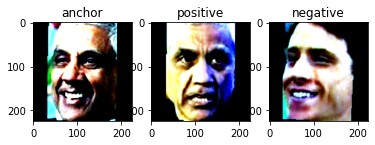

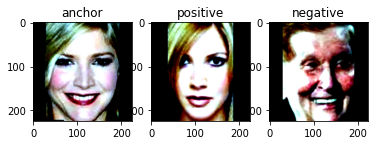

In [12]:
ts=time.time()
a_batch, p_batch, n_batch = next(iter(train_loader))
print(time.time()-ts)
model.eval()
with torch.no_grad():
    for i in range(batch_size):

        fig, ax = plt.subplots(1, 3)

        # anchor_vector=model(a_batch[i].unsqueeze(0)).detach()[0]
        # positive_vector=model(p_batch[i].unsqueeze(0)).detach()[0]
        # negative_vector=model(n_batch[i].unsqueeze(0)).detach()[0]

        ax[0].set_title("anchor")
        ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))


        ax[1].set_title("positive")
        ax[1].imshow(p_batch[i].numpy().transpose([1,2,0]))



        ax[2].set_title("negative")
        ax[2].imshow(n_batch[i].numpy().transpose([1,2,0]))




        # print(f"anchor vs Positive = {utils.euclidean_distance(anchor_vector.numpy(),positive_vector.numpy())}")
        # print(f"anchor vs negative = {utils.euclidean_distance(anchor_vector.numpy(),negative_vector.numpy())}")

TypeError: Invalid shape (3, 240, 240) for image data

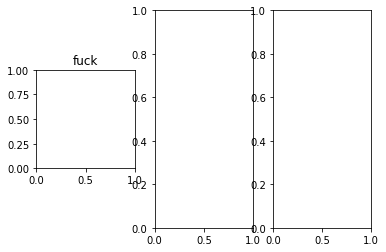

In [19]:
_, ax = plt.subplots(1, 3)
ax[0].set_title("fuck")
ax[0].imshow(a_batch[0])
_.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


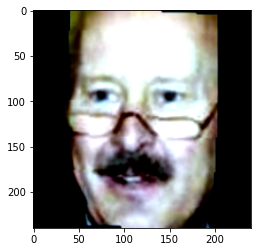

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


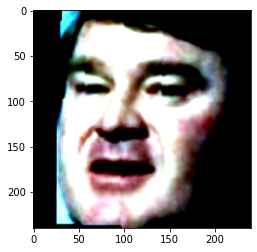

In [5]:
for i in range(batch_size):
  ax,_=plt.subplots(1,3)
  ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))
a = a[0].numpy().transpose([1,2,0])
plt.imshow(a)

In [14]:
for i in range(stop_n_layers):
  for parm in model.features[i].parameters():
    parm.requires_grad=True


In [15]:
import torch.nn as nn
model.classifier= nn.Sequential( nn.Dropout(0.3),nn.Linear(1280, 256),
                                        nn.Dropout(0.5),
                                        nn.ReLU(inplace=True), nn.Dropout(0.5),nn.Linear(256, 128),nn.ReLU(inplace=True))

In [16]:
epochs=15
learning_rate=0.001
train_notes="Classifier -->(1280,256,128)+ 5 layers train , effnetb0 "


In [23]:
model.load_local_weights("../model_weights/training/05_19 06_51 Train_(0.298891) Test_(0.357458).pt",True)

RuntimeError: Error(s) in loading state_dict for FaceDescriptorModel:
	Unexpected key(s) in state_dict: "features.1.1.block.0.0.weight", "features.1.1.block.0.1.weight", "features.1.1.block.0.1.bias", "features.1.1.block.0.1.running_mean", "features.1.1.block.0.1.running_var", "features.1.1.block.0.1.num_batches_tracked", "features.1.1.block.1.fc1.weight", "features.1.1.block.1.fc1.bias", "features.1.1.block.1.fc2.weight", "features.1.1.block.1.fc2.bias", "features.1.1.block.2.0.weight", "features.1.1.block.2.1.weight", "features.1.1.block.2.1.bias", "features.1.1.block.2.1.running_mean", "features.1.1.block.2.1.running_var", "features.1.1.block.2.1.num_batches_tracked", "features.2.2.block.0.0.weight", "features.2.2.block.0.1.weight", "features.2.2.block.0.1.bias", "features.2.2.block.0.1.running_mean", "features.2.2.block.0.1.running_var", "features.2.2.block.0.1.num_batches_tracked", "features.2.2.block.1.0.weight", "features.2.2.block.1.1.weight", "features.2.2.block.1.1.bias", "features.2.2.block.1.1.running_mean", "features.2.2.block.1.1.running_var", "features.2.2.block.1.1.num_batches_tracked", "features.2.2.block.2.fc1.weight", "features.2.2.block.2.fc1.bias", "features.2.2.block.2.fc2.weight", "features.2.2.block.2.fc2.bias", "features.2.2.block.3.0.weight", "features.2.2.block.3.1.weight", "features.2.2.block.3.1.bias", "features.2.2.block.3.1.running_mean", "features.2.2.block.3.1.running_var", "features.2.2.block.3.1.num_batches_tracked", "features.3.2.block.0.0.weight", "features.3.2.block.0.1.weight", "features.3.2.block.0.1.bias", "features.3.2.block.0.1.running_mean", "features.3.2.block.0.1.running_var", "features.3.2.block.0.1.num_batches_tracked", "features.3.2.block.1.0.weight", "features.3.2.block.1.1.weight", "features.3.2.block.1.1.bias", "features.3.2.block.1.1.running_mean", "features.3.2.block.1.1.running_var", "features.3.2.block.1.1.num_batches_tracked", "features.3.2.block.2.fc1.weight", "features.3.2.block.2.fc1.bias", "features.3.2.block.2.fc2.weight", "features.3.2.block.2.fc2.bias", "features.3.2.block.3.0.weight", "features.3.2.block.3.1.weight", "features.3.2.block.3.1.bias", "features.3.2.block.3.1.running_mean", "features.3.2.block.3.1.running_var", "features.3.2.block.3.1.num_batches_tracked", "features.4.3.block.0.0.weight", "features.4.3.block.0.1.weight", "features.4.3.block.0.1.bias", "features.4.3.block.0.1.running_mean", "features.4.3.block.0.1.running_var", "features.4.3.block.0.1.num_batches_tracked", "features.4.3.block.1.0.weight", "features.4.3.block.1.1.weight", "features.4.3.block.1.1.bias", "features.4.3.block.1.1.running_mean", "features.4.3.block.1.1.running_var", "features.4.3.block.1.1.num_batches_tracked", "features.4.3.block.2.fc1.weight", "features.4.3.block.2.fc1.bias", "features.4.3.block.2.fc2.weight", "features.4.3.block.2.fc2.bias", "features.4.3.block.3.0.weight", "features.4.3.block.3.1.weight", "features.4.3.block.3.1.bias", "features.4.3.block.3.1.running_mean", "features.4.3.block.3.1.running_var", "features.4.3.block.3.1.num_batches_tracked", "features.5.3.block.0.0.weight", "features.5.3.block.0.1.weight", "features.5.3.block.0.1.bias", "features.5.3.block.0.1.running_mean", "features.5.3.block.0.1.running_var", "features.5.3.block.0.1.num_batches_tracked", "features.5.3.block.1.0.weight", "features.5.3.block.1.1.weight", "features.5.3.block.1.1.bias", "features.5.3.block.1.1.running_mean", "features.5.3.block.1.1.running_var", "features.5.3.block.1.1.num_batches_tracked", "features.5.3.block.2.fc1.weight", "features.5.3.block.2.fc1.bias", "features.5.3.block.2.fc2.weight", "features.5.3.block.2.fc2.bias", "features.5.3.block.3.0.weight", "features.5.3.block.3.1.weight", "features.5.3.block.3.1.bias", "features.5.3.block.3.1.running_mean", "features.5.3.block.3.1.running_var", "features.5.3.block.3.1.num_batches_tracked", "features.6.4.block.0.0.weight", "features.6.4.block.0.1.weight", "features.6.4.block.0.1.bias", "features.6.4.block.0.1.running_mean", "features.6.4.block.0.1.running_var", "features.6.4.block.0.1.num_batches_tracked", "features.6.4.block.1.0.weight", "features.6.4.block.1.1.weight", "features.6.4.block.1.1.bias", "features.6.4.block.1.1.running_mean", "features.6.4.block.1.1.running_var", "features.6.4.block.1.1.num_batches_tracked", "features.6.4.block.2.fc1.weight", "features.6.4.block.2.fc1.bias", "features.6.4.block.2.fc2.weight", "features.6.4.block.2.fc2.bias", "features.6.4.block.3.0.weight", "features.6.4.block.3.1.weight", "features.6.4.block.3.1.bias", "features.6.4.block.3.1.running_mean", "features.6.4.block.3.1.running_var", "features.6.4.block.3.1.num_batches_tracked", "features.7.1.block.0.0.weight", "features.7.1.block.0.1.weight", "features.7.1.block.0.1.bias", "features.7.1.block.0.1.running_mean", "features.7.1.block.0.1.running_var", "features.7.1.block.0.1.num_batches_tracked", "features.7.1.block.1.0.weight", "features.7.1.block.1.1.weight", "features.7.1.block.1.1.bias", "features.7.1.block.1.1.running_mean", "features.7.1.block.1.1.running_var", "features.7.1.block.1.1.num_batches_tracked", "features.7.1.block.2.fc1.weight", "features.7.1.block.2.fc1.bias", "features.7.1.block.2.fc2.weight", "features.7.1.block.2.fc2.bias", "features.7.1.block.3.0.weight", "features.7.1.block.3.1.weight", "features.7.1.block.3.1.bias", "features.7.1.block.3.1.running_mean", "features.7.1.block.3.1.running_var", "features.7.1.block.3.1.num_batches_tracked". 

In [17]:
train_losses=models_train.triplet_loss_train(model,epochs=100,learn_rate=0.001,train_loader=train_loader,test_loader=test_loader,cuda=True,weight_saving_path=model_weights_path,epoch_data_saving_path=train_data_save_path,notes=train_notes)

 epoch 1 [==========] time remaining = 0.0 Avg Train_Loss=2.34613447344
 Testing  [==========] time remaining = 0.0 Avg Test_Loss=2.05374253556
 epoch 1 train_loss =2.346134410381317 test_loss=2.0537422032356263
new minimum test loss 2.053742  achieved, model weights saved 


PermissionError: [Errno 13] Permission denied: '../training log/train_data.csv'

In [8]:

saving_path=model_weights_path,epoch_data_saving_path=train_data_save_path,notes=train_notes)

NameError: name 'train_notes' is not defined

In [14]:
model.load_local_weights(model_weights_path+"/05_19 05_11 Train_(0.203699) Test_(0.367653).pt",cuda_weights=True)

In [20]:
features_dict=data_load.get_pic_features_dict(f"{dataset_path}/lfw_prep",model,transform,cuda=True)

 data processed [==========] time remaing=0.000

In [7]:
import numpy as np
type(np.array([[1,2,3]]))

numpy.ndarray

In [25]:
test_data_pd=pd.DataFrame(generate_dataset.generate_testing_data_set_frame(dataset_path+"/lfw_prep",True))

In [26]:
evaluation.model_test(features_dict,test_data_pd,results_path="",threshold=11)

 Testing  [==========] time remaining = 0.0 Accuracy =79.957Accuracy now equal --> 79.9566%


(                              Mertic          Value
 0                     processed rows  484414.000000
 1  Model accuracy on Proceed Faces %      79.957000
 2                     False Positive   84492.000000
 3                     False Negative   12601.000000
 4                          precision       0.730999
 5                             recall       0.947970
 6                        fbeta-score       0.406532
 7           avg same person distance       6.388590
 8           avg diff person distance      14.393440
 9                    Model tolerance      11.000000,
                  Actual True  Actual False
 Predicted True        229606         84492
 Predicted False        12601        157715)

In [8]:
evaluation.euclidean_distance(np.array([5,2,3]),[1,5,8])

7.0710678118654755

In [34]:
from datetime import datetime
import os


